##### Keywords: Linear algebra, Markov Chain

In [1]:
%matplotlib inline
import numpy as np
from numpy import linalg as lin
import os


## Part 1: continue from HW12_lab
1. From HW12_lab, you should be able to load rat.txt and transform it into a matrix $P$
1. For the matrix $P$, write code to compute and PRINT OUT its time to absorption, and the corresponding probability to be absorbed by absorption state(s) via canonical form of $P$.

In [2]:
## just to load the matrix P
##############################
cwd      = os.getcwd() 
datapath = cwd + u'/data/'
filename = datapath+u'rat.txt'
P        = np.matrix( np.loadtxt(filename,delimiter= ',') )
print(P)


[[ 0.          0.5         0.5         0.          0.        ]
 [ 0.5         0.          0.          0.5         0.        ]
 [ 0.5         0.          0.          0.5         0.        ]
 [ 0.          0.33333333  0.33333333  0.          0.33333333]
 [ 0.          0.          0.          0.          1.        ]]


In [3]:
## We have 5 states in total
## We have ONE absorption state
##############################

N_absorption = 1 


## Q is the upper left square matrix of size
## 5-1 by 5-1
##############################
Q = P[:len(P)-1,:len(P)-1]
print('Q')
print(Q)

## R is the upper Right matrix of size
## 5-1 by 1
##############################
R = P[:len(P)-1,len(P)-1:]
print('R')
print(R)

## We need to find N = (I - Q)^(-1)
##############################
diff = np.matrix(np.eye(5-1)-Q)
N    = diff**(-1)
print('N')
print(N)

Q
[[ 0.          0.5         0.5         0.        ]
 [ 0.5         0.          0.          0.5       ]
 [ 0.5         0.          0.          0.5       ]
 [ 0.          0.33333333  0.33333333  0.        ]]
R
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.33333333]]
N
[[ 3.99999994  2.99999994  2.99999994  2.99999994]
 [ 2.99999994  3.49999994  2.49999994  2.99999994]
 [ 2.99999994  2.49999994  3.49999994  2.99999994]
 [ 1.99999994  1.99999994  1.99999994  2.99999994]]


In [4]:
## absorption Probability  
##############################
absP = N*R
absP = np.round(absP,3)
print('absorption Probability ')
print(absP)

## Time to Absorption  
##############################

absT =  N*np.ones((len(P)-1,1))
absT =  np.round(absT,3)

print('absorption Probability ')
print(absT)


absorption Probability 
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
absorption Probability 
[[ 13.]
 [ 12.]
 [ 12.]
 [  9.]]


##  Part 2: continue from Lab12 and HW12_lab
<img src="5rat.png" alt="Drawing" style="width: 100px;"/>
$\textbf{First}$, write a function, called $\textbf{steps()}$ (similar to steps() in lab12.ipynb) to simulate rat's moves provided by the above picture (same as written homework description). 

The function steps()'s input should be an integer corresponds to the starting cell label (i.e. 1,2,3,4,5); 

output should the number of steps it takes for the rat to reach freedom from the input cell. Note that this needs to be a simulation run of the rat's moves.


While running the function, it should print out the path of the rat's move.

Now, run steps(2) 10 times, your code should print out 10 different paths, and for each path the total number of steps.


$\textbf{Second}$, you need to run simulations to calculate the number of steps, on average, it takes the rat to get to freedom from a given cell
1. Turn off "print path" feature in your steps function. 
1. for each starting cell, run $N = 500$ experiments and save it as an array of size 500 (say name it arr). Each experiment corresponds to an average of 100 simulations i.e. run the function steps(starting cell) 100 times, and compute its average. Then store it to arr. Then plot the histogram of the arr, and print the mean of the arr.

For this part, you should printout 5 histograms and 5 means

In [5]:
## Note: 
## Here I treat 0- as "1" labeld in the picture
##        treat 1- as "2" labeld in the picture
##        treat 2- as "3" labeld in the picture
## ...    treat 4 as the freedom -- absorption state
######################################################

S = [0,1,2,3,4]
def steps(i):
    #print(i,'->')
    if(i==4):
        return 0
    if(i == 0):
        next_move = np.random.choice([1,2])
        return 1+ steps(next_move)
    if(i == 1 or  i== 2):
        next_move = np.random.choice([0,3])
        return 1+ steps(next_move)        
    if(i==3):
        next_move = np.random.choice([1,2,4])
        return 1+ steps(next_move)   

In [6]:
## Experiments
####################
N_exp         = 500
N_simulations = 100
N_s           = len(S)
experiments = np.zeros((N_s,N_exp))

for block in S:
    for i in range(N_exp):
        each_experiment = np.zeros(N_simulations)
        for j in range(N_simulations):
            each_experiment[j] = steps(block)
    
        experiments[block,i] = np.mean(each_experiment)


Time to absorption
 [[ 13.]
 [ 12.]
 [ 12.]
 [  9.]]


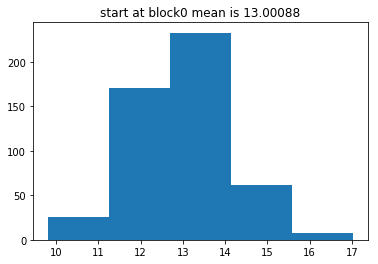

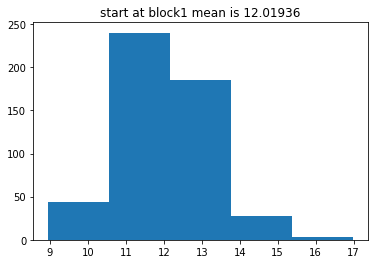

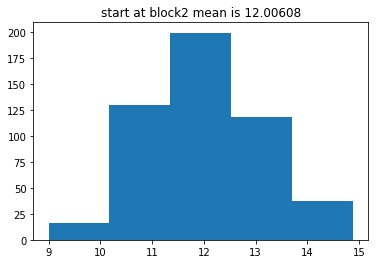

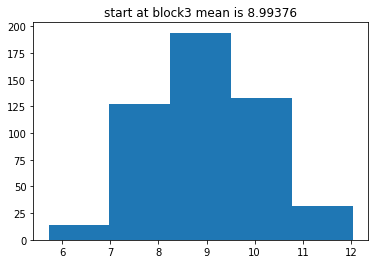

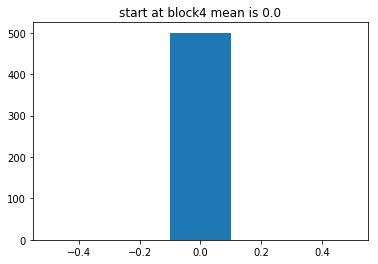

In [7]:
## Histogram -- the print out should be the same as Time to absorption
####################
import matplotlib.pyplot as plt

print('Time to absorption\n',absT)
for block in S:
    plt.hist(experiments[block,:],bins = 5)
    plt.title('start at block' + str(block)+' mean is ' + str(np.mean(experiments[block,:])))
    plt.show()
    
    


# part 3
## Write a function, which can do the following:
1. The function's input is a matrix A
1. The function's return is 0 if $A$ is not an absorbing markov chain's transition matrix
1. The function's return is a positive integer $K$ if $A$ is the transition matrix of an absorbing markov chain with $K$ absorption states. 
1. Meanwhile, the function should be able to transform $A$ into the canonical form if $A$ is the transition matrix of an absorbing markov chain with $K$ absorption states

## Write a function, which can do the following:
1. The function's input is a matrix A
1. The function's return is a pair of matrices T and P.
1. If $A$ is the transition matrix of an absorbing markov chain, then T is the time to absorption; and P is the probability matrix of absorption
1. If $A$ is not the transition matrix for an absorbing markov chain, then assign T = -1, and P = -1. Return the pair -1,-1



In [8]:
def if_markov(A):
    ##$A$ needs to be square matrix
    ##################################
    shape = A.shape
    if(len(shape)!=2): ## cannot be an m by n by r matrix
        print('shape wrong')
        return False
    
    if(shape[0] != shape[1]): ## need to be square matrix
        print('shape wrong')
        return False
    
    ## $A$ needs to have all entries \in[0,1] 
    ## np.all -- if all values inside are True
    ## np.logical_and -- compare entrywise logical and
    ################################################
    val = np.all(np.logical_and(A >= 0,A<=1))
    if(val!=True):
        print('not 0 1')
        return False
    
    ## Each row of $A$ should have summation 1
    ################################################
    rsum = np.round(A.sum(axis = 1),5)
    val = np.all(rsum == 1.0)

    return val


In [9]:
def swap(A,i,j):
    ## swap position of i,j row and columes of A
    r = np.copy(A[j,:])
    A[j,:] = A[i,:]
    A[i,:] = r
    
    c = np.copy(A[:,j])
    A[:,j] = A[:,i]
    A[:,i] = c
    

## return value is the number of absorption states
def if_absmarkov(A):
    if(if_markov(A) ==  False):
        print('not markov')
        return 0
    ## determine if diagonal has 1.
    ## np.any: return if there is at least one True
    ##################################
    diag_entry = (np.diag(A)==1)
    if(np.any(diag_entry) == False):
        print('no absorption')

        return 0
    
    ## Now we need to transform 
    ## A into the canonical form
    ##################################
    S     = np.arange(len(A))
    N_abs = np.sum(diag_entry)
    pos   = len(A)-1
    
    ## Check if A is already in canonical form
    ##########################################
    while(pos > len(A)-1-N_abs):
        if(diag_entry[pos] == True):
            pos -= 1
        else:
            pos = -2
            break
            
    if(pos == -2):
        print('Not canonical form')
    else:
        print('canonical form')
        
    ## Transform A into canonical form
    ##########################################        
    abs_pos = S[diag_entry] ## absorption states
    otherp  = S[~diag_entry]
    bottem  = -1
    for j in abs_pos:
        if( j < len(A)-N_abs):
            swap(A,j,otherp[bottem])
            bottem -= 1
        else:
            break
            
    ## For the canonical form, we can try to see if 
    ## the upper left Q, if (I-Q) is invertible,
    ## That is to see if all eigenvalues of (I-Q) are nonzero
    ##########################################  
    if(N_abs<len(A)):
        I    = np.eye(len(A) - N_abs)
        test = I - A[:len(A) - N_abs,:len(A)-N_abs]
        eigv = np.round(lin.eigvals(test),5)
        if(np.any(eigv==0)):
            return 0
    
    return N_abs



In [10]:
Q = P[:len(P)-1,:len(P)-1]
print('Q')
print(Q)

## R is the upper Right matrix of size
## 5-1 by 1
##############################
R = P[:len(P)-1,len(P)-1:]
print('R')
print(R)

## We need to find N = (I - Q)^(-1)
##############################
diff = np.matrix(np.eye(5-1)-Q)
N    = diff**(-1)
print('N')
print(N)

Q
[[ 0.          0.5         0.5         0.        ]
 [ 0.5         0.          0.          0.5       ]
 [ 0.5         0.          0.          0.5       ]
 [ 0.          0.33333333  0.33333333  0.        ]]
R
[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.33333333]]
N
[[ 3.99999994  2.99999994  2.99999994  2.99999994]
 [ 2.99999994  3.49999994  2.49999994  2.99999994]
 [ 2.99999994  2.49999994  3.49999994  2.99999994]
 [ 1.99999994  1.99999994  1.99999994  2.99999994]]


In [11]:
## return value is a pair of matrix
def decompose(A):
    N_abs = if_absmarkov(A)
    if(N_abs <= 0):
        return -1, -1
    
    Len   = len(A)
    A     = np.matrix(A)
    if(Len == N_abs):
        return(np.zeros((Len,1)), A)
    
    Q = A[:Len-N_abs,:Len - N_abs ]
    R = A[:Len-N_abs, Len-N_abs: ]
    diff = np.matrix(np.eye(Len-N_abs)-Q)
    N    = diff**(-1)
    absP = N*R
    absT = N*np.ones((Len-N_abs,1))
    return absT, absP

## You may first use the matrix $P$ we stated in question 1. To see if you obtain the same result by using the functions defined above.


In [12]:
print(P)
absT, absP = decompose(P)
print(absT)
print(absP)

[[ 0.          0.5         0.5         0.          0.        ]
 [ 0.5         0.          0.          0.5         0.        ]
 [ 0.5         0.          0.          0.5         0.        ]
 [ 0.          0.33333333  0.33333333  0.          0.33333333]
 [ 0.          0.          0.          0.          1.        ]]
canonical form
[[ 12.99999976]
 [ 11.99999976]
 [ 11.99999976]
 [  8.99999976]]
[[ 0.99999997]
 [ 0.99999997]
 [ 0.99999997]
 [ 0.99999997]]


### if your input matrix $A$ is
$$
\begin{pmatrix}
 0.          &0.1     &    0.2    &     0.3     &    0.4  \\
 0.14285714  &0.17142857  &0.2         &0.22857143  &0.25714286 \\
 0.          &0.          &1.          &0.          &0.        \\
 0.          &0.          &0.          &1.          &0.        \\
 0.18181818  &0.19090909  &0.2         &0.20909091  &0.21818182\\
\end{pmatrix}
$$

Then the output of the first function is 2

The output for the second function is:
$$
\begin{matrix}
[[ 2.17005076],\\
 [ 2.30964467] \\
 [ 2.34771574]]\\
\end{matrix}~~~~~~~
\begin{matrix}
[[ 0.56598985  0.43401015]\\
 [ 0.53807107  0.46192893]\\
 [ 0.53045685  0.46954315]]\\
\end{matrix}
$$


In [13]:
## Please don't change these matrices. 
## You will use them to test your results
##########################################

A = np.arange(25).reshape(5,5)
A = A/A.sum(axis = 1).reshape((5,1))
A[2,] = [0,0,1,0,0]
A[3,] = [0,0,0,1,0]

print(A)
absT, absP = decompose(A)
print(absT)
print(absP)

[[ 0.          0.1         0.2         0.3         0.4       ]
 [ 0.14285714  0.17142857  0.2         0.22857143  0.25714286]
 [ 0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [ 0.18181818  0.19090909  0.2         0.20909091  0.21818182]]
Not canonical form
[[ 2.17005076]
 [ 2.30964467]
 [ 2.34771574]]
[[ 0.56598985  0.43401015]
 [ 0.53807107  0.46192893]
 [ 0.53045685  0.46954315]]


### if your input matrix $B$ is B = np.eye(4)
Then the output of the first function is: 4

The output of the second function is:
$$
\begin{matrix}
[[ 0.],\\
[ 0.],\\
[ 0.],\\
[ 0.]]\\
\end{matrix}~~~~~~~
\begin{matrix}
[[ 1.,  0.,  0.,  0.],\\
[  0., 1.,  0.,  0.],\\
[ 0.,  0., 1.,  0.],\\
[ 0.,  0.,  0.,1.]]\\
\end{matrix}
$$


In [14]:
B = np.eye(4)
print(B)
absT, absP = decompose(B)
print(absT)
print(absP)

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
canonical form
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


### if your input matrix $C$ is C = np.eye(4)+1
Then the output of the first function is: 0

The output of the second function is: -1,-1

In [15]:
C = np.eye(4)+1
print(C)
absT, absP = decompose(C)
print(absT)
print(absP)

[[ 2.  1.  1.  1.]
 [ 1.  2.  1.  1.]
 [ 1.  1.  2.  1.]
 [ 1.  1.  1.  2.]]
not 0 1
not markov
-1
-1


### if your input matrix $D$ is D = np.array([ [0.5, 0.5, 0], [0.6, 0.4, 0],[0, 0, 1]   ])
Then the output of the first function is: 0

The output of the second function is: -1,-1

In [16]:

D = np.array([ 
    [0.5, 0.5, 0], 
    [0.6, 0.4, 0],
    [0, 0, 1]   ])

print(D)
absT, absP = decompose(D)
print(absT)
print(absP)

[[ 0.5  0.5  0. ]
 [ 0.6  0.4  0. ]
 [ 0.   0.   1. ]]
canonical form
-1
-1
